In [1]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,7
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [178]:
data_ = pd.read_csv('tmdb_5000_movies.csv')
data_.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [239]:
# оставим нужные нам столбцы
data = data_[
    ['budget',
     'original_language', 
     'original_title', 
     'popularity',     
     'release_date',
     'revenue', 
     'runtime', 
     'title', 
     'vote_average', 
     'vote_count']
]
data.head()

,budget,original_language,original_title,popularity,release_date,revenue,runtime,title,vote_average,vote_count
0,237000000,en,Avatar,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800
1,300000000,en,Pirates of the Caribbean: At World's End,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,en,Spectre,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466
3,250000000,en,The Dark Knight Rises,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106
4,260000000,en,John Carter,43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124


In [6]:
# построим столбчатую диаграмму 10 самых популярных фильмов в зависимости от рейтинга. Для этого возьмем название фильма
# и его среднюю оценку, определим 10 самых популярных фильмов, отобразим их на диаграмме, где наглядно увидим, какие 
# фильмы занимают лидирующие позиции.
data_ = data.filter(items = ['title', 'vote_average'])
data_popular = data_.sort_values('vote_average', ascending=False).head(10)

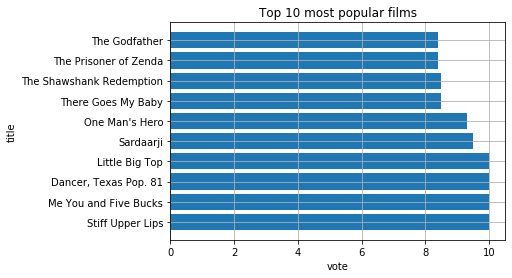

In [7]:
plt.barh(data_popular['title'], data_popular['vote_average'])
plt.xlabel('vote')
plt.ylabel('title')
plt.title('Top 10 most popular films')
plt.grid()

In [14]:
# найдем 10 самых окупаемых фильмов, построим диаграмму, где сравним визуально, на сколько отличается бюджет фильма от
# полученного дохода

data_1 = data.filter(items = ['title', 'budget', 'revenue'])
data_1['diff'] = data_1['revenue'] - data_1['budget']
data_2 = data_1.sort_values('diff', ascending=False).head(10)
data_3 = data_2.filter(items = ['title', 'budget', 'revenue'])
data_4 = data_3.pivot_table(index='title')
data_4

,budget,revenue
title,,
Avatar,237000000,2787965087
Avengers: Age of Ultron,280000000,1405403694
Frozen,150000000,1274219009
Furious 7,190000000,1506249360
Iron Man 3,200000000,1215439994
Jurassic World,150000000,1513528810
Minions,74000000,1156730962
The Avengers,220000000,1519557910
The Lord of the Rings: The Return of the King,94000000,1118888979


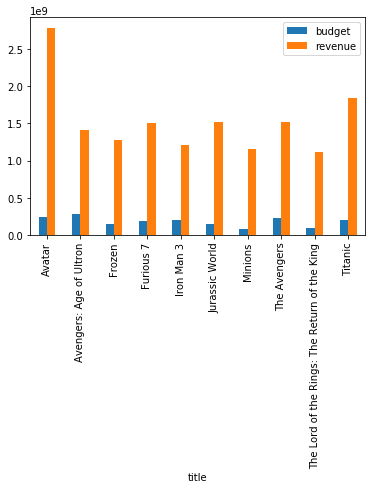

In [17]:
data_4.plot(kind='bar', rot=90)

In [107]:
# посмотрим как связаны между собой популярность фильмов и заложенный в них бюджет
# как видно из двух графиков сумма бюджета не увеличивает популярность фильмов
data_5 = data.filter(items = ['budget', 'popularity'])
data_5['popularity'] = data_5.popularity.astype('int64')
data_5.head()

,budget,popularity
0,237000000,150
1,300000000,139
2,245000000,107
3,250000000,112
4,260000000,43


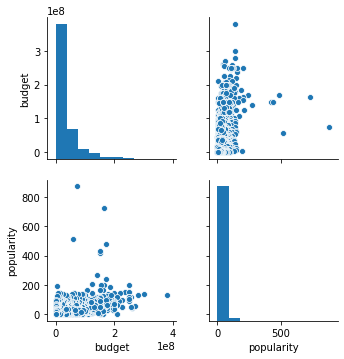

In [108]:
sns_plot = sns.pairplot(
    data_5[['budget', 'popularity']])
sns_plot

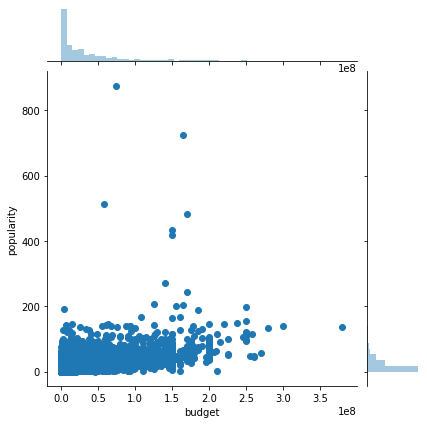

In [110]:
sns.jointplot(x='budget', y='popularity', 
              data=data_5, kind='scatter')

In [126]:
# Посмотрим на графике, как зависит популярность фильмов на английском языке в зависимости от даты выпуска фильма.
# Для этого отфильтруем таблицу по original_language(en), построим график, где по x - годы, по y - значения популярности.
# Как видно из графика современные фильмы(особенно после 2000 более популярны)

data_6 = data.filter(items = ['original_language', 'popularity', 'release_date'])
data_6

,original_language,popularity,release_date
0,en,150.437577,2009-12-10
1,en,139.082615,2007-05-19
2,en,107.376788,2015-10-26
3,en,112.312950,2012-07-16
4,en,43.926995,2012-03-07
...,...,...,...
4798,es,14.269792,1992-09-04
4799,en,0.642552,2011-12-26
4800,en,1.444476,2013-10-13
4801,en,0.857008,2012-05-03


In [174]:
filtered_language = data_6[ (data_6['original_language']=='en') ]
df1 = filtered_language.filter(items = ['popularity', 'release_date'])
df1.head()

,popularity,release_date
0,150.437577,2009-12-10
1,139.082615,2007-05-19
2,107.376788,2015-10-26
3,112.312950,2012-07-16
4,43.926995,2012-03-07


In [176]:
trace0 = go.Scatter(
    x=df1.release_date,
    y=df1.popularity,
    mode = 'markers'
)

data = [trace0]
layout = {'title': 'popularity by year', 'yaxis': {'title': 'popularity'}, 
          'xaxis': {'title': 'release_date'}}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

In [237]:
# возьмем 20 самых популярных фильмов и посмотрим на графике, влияет ли длительность фильма на его популярность. 
# из графика можно сделать вывод, что длительность фильма не влияет на его популярность.
data_7 = data.filter(items = ['original_title', 'popularity', 'runtime'])
data_7['popularity'] = data_7.popularity.astype('int64')
a = data_7.sort_values('popularity', ascending=False).head(20)
a

,original_title,popularity,runtime
546,Minions,875,91.0
95,Interstellar,724,169.0
788,Deadpool,514,108.0
94,Guardians of the Galaxy,481,121.0
127,Mad Max: Fury Road,434,120.0
28,Jurassic World,418,124.0
199,Pirates of the Caribbean: The Curse of the Bla...,271,143.0
82,Dawn of the Planet of the Apes,243,130.0
200,The Hunger Games: Mockingjay - Part 1,206,123.0
88,Big Hero 6,203,102.0


In [238]:
trace0 = go.Scatter(
    x=a.original_title,
    y=a.runtime,
    name='runtime'
)


  
data = [trace0]
layout = {'title': 'The dependence of the popularity from time'}

fig = go.Figure(data=data, layout=layout)

iplot(fig)